# 17 Oct 23 - Activity: Normal Modes

As we begin to work with multi-particle systems, we begin to open the number of degrees of freedom of the system. We increase the complexity of it and the challenge of modeling it. We will increasingly need tools that help us take less tractable issues and make them palatable. One such tool that forms the basis of many others is **Normal Modes**.

Normal modes are ways of breaking up our understanding of a system into discrete (potentially infinite and hopefully vanishingly small) pieces. This lets us get at the big picture of the system and characterize how much we are neglecting. The concept of normal modes underlies much of the analysis done in quantum mechanics, field theory, fluid mechanics, and signal processing. In fact, numerical routines often make use of forms of these modes to do economize calculations -- *especially when we move beyond a few hundred bodies in the system*. This stuff is part and parcel of most research in physics. For example, how we understand the [Cosmic Background Radiation](https://en.wikipedia.org/wiki/Cosmic_background_radiation) relies on a [normal mode like analysis](https://www.quantamagazine.org/how-ancient-light-reveals-the-universes-contents-20200128/).


## Canonical Coupled Oscillators


There is still plenty of room for pencil and paper. We will explore this numerically later. 

We will start with a form of guided lecture and build the understanding of these methods together. Then you will apply what you learned to a new system.

Let's assume you have a chain of two mass connected by springs (all the same $k$) as below.

<img src='https://www.entropy.energy/static/resources/coupled-oscillators/two-coupled-gliders-diagram.png' alt='Coupled Oscillator set up. Two oscillators connected by three springs in a horizontal line.' width=800px/>

### Deriving the Equations of Motion

Let's write the Lagrangian for this system to get equations of motion. The kinetic and potential energies are:

$$T=\frac{1}{2}m\dot{x}_1^2+\frac{1}{2}m\dot{x}_2^2$$
$$U=\frac{1}{2}k{x_1}^2+\frac{1}{2}k(x_2-x_1)^2 + \frac{1}{2}k{x_2}^2$$

Thus the Lagrangian is for this system is:

$$L = \frac{1}{2}m\dot{x}_1^2+\frac{1}{2}m\dot{x}_2^2 - \frac{1}{2}k{x_1}^2-\frac{1}{2}k(x_2-x_1)^2 - \frac{1}{2}k{x_2}^2$$

Which produces two equations of motion:

$$\frac{d}{dt}\left(\frac{\partial L}{\partial \dot{x}_1}\right) - \frac{\partial L}{\partial x_1} = 0$$
$$\frac{d}{dt}\left(\frac{\partial L}{\partial \dot{x}_2}\right) - \frac{\partial L}{\partial x_2} = 0$$

Which we can write as:

$$m\ddot{x}_1 = -kx_1 + k(x_2-x_1)$$
$$m\ddot{x}_2 = -kx_2 + k(x_1-x_2)$$

Or

$$\ddot{x}_1 = -\frac{2k}{m}x_1 + \frac{k}{m}x_2$$
$$\ddot{x}_2 = -\frac{2k}{m}x_2 + \frac{k}{m}x_1$$



#### Method 2: Matrix Analysis (the Eigenvalue Problem)

That analysis to find the normal modes was a bit of a pain in algebra. As we add more objects, that pain will grow. We can use a matrix approach to make this easier. It's also a systematic approach that as we will see plays nicely with computing. 

Starting from the equations of motion:

$$\ddot{x}_1 = -\frac{2k}{m}x_1 + \frac{k}{m}x_2$$
$$\ddot{x}_2 = -\frac{2k}{m}x_2 + \frac{k}{m}x_1$$

We rewrite them as a set of matrix equations for the vector $\mathbf{x} = \begin{bmatrix}x_1\\x_2\end{bmatrix}$:

$$\ddot{\mathbf{x}} = \begin{bmatrix}-\frac{2k}{m} & \frac{k}{m}\\\frac{k}{m} & -\frac{2k}{m}\end{bmatrix}\mathbf{x}$$

This is a form of the equation $\ddot{\mathbf{x}} = \pmb{A} \mathbf{x}$ where $\pmb{A}$ is the coefficient matrix. We can solve this equation by finding the eigenvalues and eigenvectors of $\pmb{A}$. The eigenvalues are the frequencies of the normal modes and the eigenvectors are the relative amplitudes of the masses. The reason is that the determinant of the coefficient matrix when there is a normal mode solution vanishes. That is,

$$\det(\pmb{A}-\omega^2\pmb{I}) = 0$$

where $\pmb{I}$ is the identity matrix. This is a polynomial equation in $\omega^2$ and the roots of that polynomial are the normal mode frequencies.  This technique is very common in theoretical physics with different guesses for the solution forms giving rise to different eigenvalue problems (e.g., [Bessel functions for 2D surface problems](https://en.wikipedia.org/wiki/Bessel_function) or [Hermite polynomials for the Quantum Harmonic Oscillator](https://en.wikipedia.org/wiki/Hermite_polynomials).

**&#9989; Do this** 

1. Using the "determinant of the coefficient matrix" (really the eigenvalues of $\pmb{A}$ solved by $\det(\pmb{A}-\omega^2\pmb{I})$), find the normal mode $\omega^2$.
2. Find the eigenvectors of the coefficient matrix. These are the relative amplitudes of the masses.
3. These results should agree with the previous method. Do they?
4. Plot the normal modes solutions.

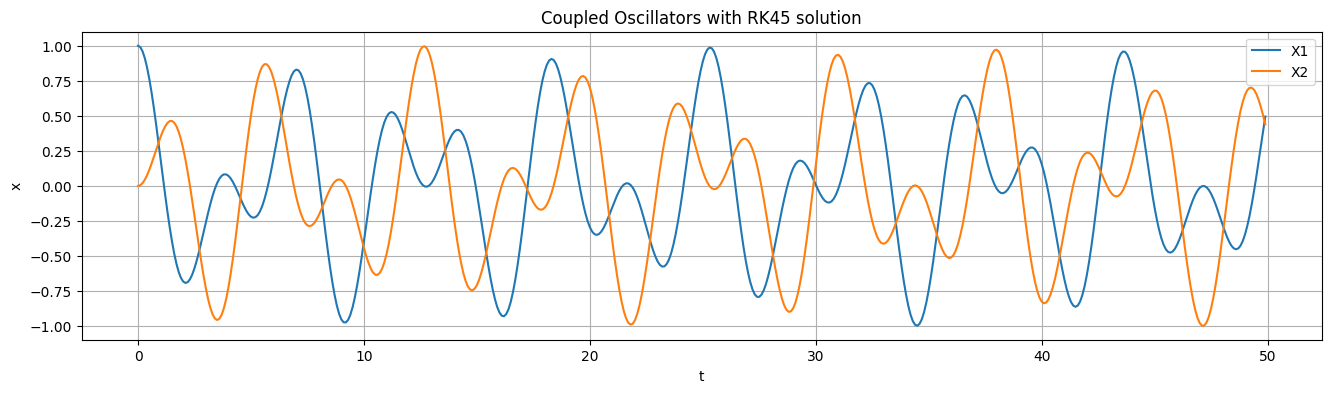

In [6]:
## your code here

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# 1. Derivatives Function
def diffyqs(t, curr_vals, k, m):
    x1, v1, x2, v2 = curr_vals 
    v1dot = -2*(k/m)*x1 + (k/m)*x2
    v2dot = (k/m)*x1 - 2*(k/m)*x2
    return v1, v1dot, v2, v2dot 

# 2. Time Setup
tmax = 50
dt = 0.1
tspan = (0, tmax)
t = np.arange(0, tmax, dt)

# 3. Parameters and Initial Conditions
initial_condition = [1, 0, 0, 0] 
k = 1
m = 1

# 4. Call Integrator (note we can swamp them out, RK45 is the default)
RK45solved = solve_ivp(diffyqs, tspan, initial_condition, t_eval = t, args = (k,m), method="RK45")



plt.figure(figsize=(16,4))
plt.plot(t,RK45solved.y[0], label = "X1")
plt.plot(t,RK45solved.y[2], label = "X2")
plt.title("Coupled Oscillators with RK45 solution")
plt.xlabel("t")
plt.ylabel("x")
plt.legend()
plt.grid()

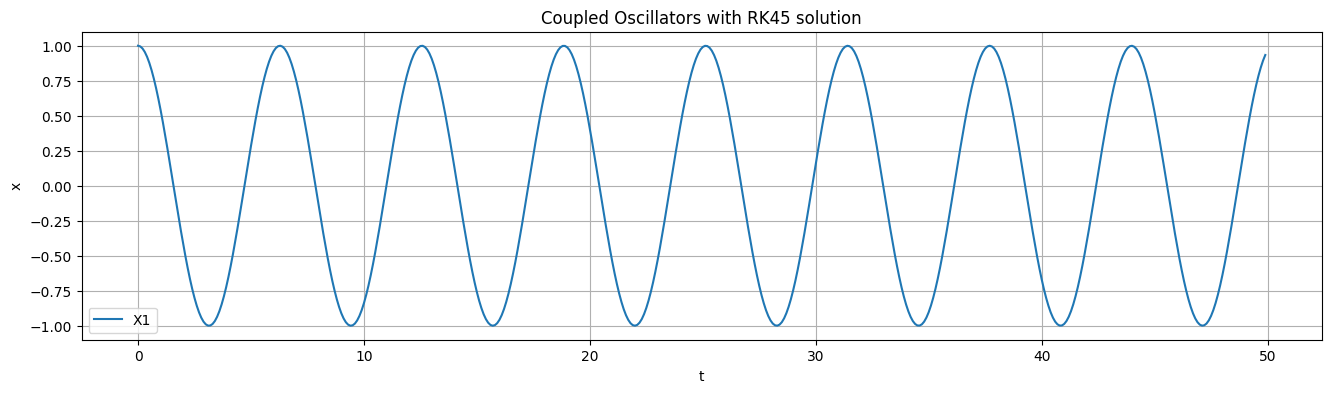

In [8]:
plt.figure(figsize=(16,4))
plt.plot(t,RK45solved.y[0]+RK45solved.y[2], label = "X1")
plt.title("Coupled Oscillators with RK45 solution")
plt.xlabel("t")
plt.ylabel("x")
plt.legend()
plt.grid()

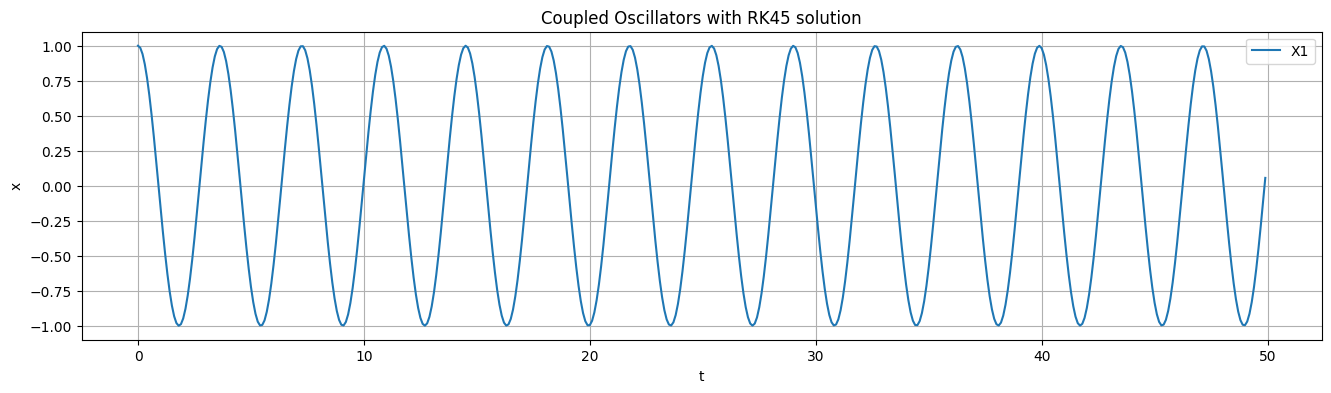

In [7]:
plt.figure(figsize=(16,4))
plt.plot(t,RK45solved.y[0]-RK45solved.y[2], label = "X1")
plt.title("Coupled Oscillators with RK45 solution")
plt.xlabel("t")
plt.ylabel("x")
plt.legend()
plt.grid()

## Applying Normal Modes to a New System

### Two vertical pendulums connected by a spring

Consider two vertical pendulums of length $l$ connected via their masses $M$ by a weak spring $k$. By weak, we mean that the spring constant is small. See below for a canonical setup:

<img src="http://www.maths.surrey.ac.uk/explore/michaelspages/coupled/coupled_diag.jpg" />

**&#9989; Do this** 

1. In this limit, write down the pair of second order linear differential equations for the horizontal motion of each pendulum bob around its equilibrium.
2. Find and describe the normal modes. Use plots of your choosing to explain what you found.

In [3]:
## your code here

## Three Coupled Oscillators

Consider the setup below consisting of three masses connected by springs to each other. We intend to find the normal modes of the system by denoting each mass's displacement ($x_1$, $x_2$, and $x_3$).

![3 Coupled Oscillators](../assets/images/3_coupled_osc.png)

## Finding the Normal Mode Frequencies

**&#9989; Do this** 

This is not magic as we will see, it follows from our choices of solution. Here's the steps and what you might notice about them:

1. Guess what the normal modes might look like? Write your guesses down; how should the masses move? (It's ok if you are not sure about all of them, try to determine one of them)
2. Write down the energy for the whole system, $T$ and $U$ (We have done this before, but not for this many particles)
3. Use the Euler-Lagrange Equation to find the equations of motion for $x_1$, $x_2$, and $x_3$. (We have done this lots, so make sure it feels solid)
4. Reformulate the equations of motion as a matrix equation $\ddot{\mathbf{x}} = \mathbf{A} \mathbf{x}$. What is $\mathbf{A}$? (We have done this, but only quickly, so take your time)
5. Consider solutions of the form $Ce^{i{\omega}t}$, plug that into $x_1$, $x_2$, and $x_3$ to show you get $\mathbf{A}\mathbf{x} = -\omega^2 \mathbf{x}$. (We have not done this, we just assumed it works! It's ok if this is annoying, we only have to show it once.)
6. Find the normal mode frequencies by taking the determinant of $\mathbf{A} - \mathbf{I}\lambda$. Note that this produces the following definition: $\lambda = -\omega^2$ (We have not done this together and we can if it's confusing.)

## Finding the Normal Modes Amplitudes

Ok, now we need to find the normal mode amplitudes. That is we assumed sinusoidal oscillations, but at what amplitudes? We will show how to do this with one frequency ($\omega_1$), and then break up the work of the the other two. These frequencies are:

$$\omega_A = 2\dfrac{k}{m}; \qquad \omega_B = \left(2-\sqrt{2}\right)\dfrac{k}{m}; \qquad \omega_C = \left(2+\sqrt{2}\right)\dfrac{k}{m}\qquad$$

**&#9989; Do this** 

After we do the first one, pick another frequencies and repeat. Answer the follow questions:

1. What does this motion physically look like? What are the masses doing?
2. How does the frequency of oscillation make sense? Why is it higher or lower than $\omega_A$?

* [Partial Solution to Activity](../assets/notes/Notes-Three_Coupled_Oscillators.pdf)